In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.metrics import classification_report, f1_score, accuracy_score, recall_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
import random
from sklearn.metrics import r2_score

In [67]:
data = pd.read_csv("EMB_all_final.csv")
data = data.drop(['Unnamed: 0'], 1)
data.iloc[44410,-2] = -1
data

,userName,date,content,score,if_apple,if_useful,crush,data,keyboard,time/life,IP,system upgrad,connection,other-tech,money,UI_UX,event,mechanism,ad
0,Jocelyn Sy,2022-10-27 18:10:20,fun,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0
1,crystal may,2022-10-27 12:17:07,aw matter game close progress spent coin gem l...,1,0,1.0,0.0,-1.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0
2,Coreter,2022-10-27 07:07:17,cool,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0
3,Jordan Christie,2022-10-26 15:11:40,use love game recent new go sync progress acco...,2,0,1.0,0.0,0.0,0.0,0.0,0.0,0,-1,-1,0.0,0.0,0.0,0.0,0.0
4,Heather Nicole,2022-10-26 03:42:00,love game dont know shut time clear make sure ...,4,0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163653,jfsajk,2017-12-02 06:57:59,great,5,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0
163654,ty lol ty,2022-09-26 07:38:26,fun,5,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0
163655,pogdw,2022-09-20 21:43:42,fun,4,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0
163656,arajuju,2022-08-03 12:04:10,love,5,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0


In [68]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid_obj = SentimentIntensityAnalyzer()

polarity = [round(sid_obj.polarity_scores(i)['compound'], 2) for i in data['content']]
data['senti_score'] = polarity

In [69]:
data.columns

Index(['userName', 'date', 'content', 'score', 'if_apple', 'if_useful',
       'crush', 'data', 'keyboard', 'time/life', 'IP', 'system upgrad',
       'connection', 'other-tech', 'money', 'UI_UX', 'event', 'mechanism',
       'ad', 'senti_score'],
      dtype='object')

In [71]:
name = ['crush', 'data', 'keyboard', 'time/life', 'IP', 'system upgrad',
       'connection', 'other-tech', 'money', 'UI_UX', 'event', 'mechanism',
       'ad']

In [72]:
# data = data[data['score'] <= 3]

In [73]:
data_whole = data.copy()
X_raw = data_whole[name]
y = data_whole['score']
for i in name:
    X_raw[i] = X_raw[i].astype("category")
X = pd.get_dummies(X_raw, columns = name, drop_first = True)
X_raw

<ipython-input-73-6b1d109891ca>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_raw[i] = X_raw[i].astype("category")


,crush,data,keyboard,time/life,IP,system upgrad,connection,other-tech,money,UI_UX,event,mechanism,ad
0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0
1,0.0,-1.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0,-1,-1,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163653,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0
163654,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0
163655,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0
163656,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0


In [74]:
# whole:
clf = RandomForestClassifier()
clf = clf.fit(X_raw,y)
y_pred = clf.predict(X_raw)
accuracy_score(y_pred,y)

0.7008028938395923

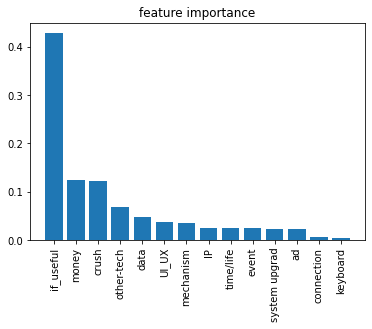

In [32]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X_raw.columns[i] for i in indices]

plt.figure()
plt.title("feature importance")
plt.bar(range(X_raw.shape[1]), importances[indices])
plt.xticks(range(X_raw.shape[1]), names, rotation = 90)
plt.show()

In [75]:
clf = SGDClassifier(random_state = 0)
clf = clf.fit(X,y)
y_pred = clf.predict(X)
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           1       0.46      0.09      0.15     11941
           2       0.18      0.01      0.02      5853
           3       0.20      0.07      0.11     10622
           4       0.38      0.01      0.01     22827
           5       0.71      0.99      0.83    112415

    accuracy                           0.69    163658
   macro avg       0.39      0.23      0.22    163658
weighted avg       0.59      0.69      0.59    163658



In [69]:
import xgboost as xgb
clf = xgb.XGBClassifier(verbosity=0)
clf = clf.fit(X,y)
y_pred = clf.predict(X)
print(classification_report(y,y_pred))

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got [1 2 3]

In [10]:
X.columns

Index(['crush_0.0', 'data_0.0', 'data_1.0', 'keyboard_0.0', 'keyboard_1.0',
       'time/life_0.0', 'time/life_1.0', 'IP_0.0', 'IP_1.0', 'system upgrad_0',
       'system upgrad_1', 'connection_0', 'connection_1', 'other-tech_0',
       'other-tech_1', 'money_0.0', 'money_1.0', 'UI_UX_1.0', 'event_0.0',
       'event_1.0', 'mechanism_0.0', 'mechanism_1.0', 'ad_0.0', 'ad_1.0'],
      dtype='object')

In [11]:
clf.classes_

array([1, 2, 3, 4, 5])

In [12]:
clf.coef_

array([[-5.16782998e-02, -1.17450681e-01, -5.63763270e-02,
         1.40940818e-02,  1.17552087e-15, -1.83223063e-01,
        -2.16109254e-01, -4.69802725e-03, -4.69802725e-02,
        -2.34901363e-02, -3.28861908e-02, -9.39605450e-03,
        -4.69802725e-03, -4.22822453e-02, -4.22822453e-02,
        -1.40940818e-02, -4.69802725e-03, -5.63763270e-02,
        -2.81881635e-02, -1.40940818e-02,  1.40940818e-02,
        -3.28861908e-02,  9.39605450e-03,  2.81881635e-02],
       [-2.77587014e-02, -2.16744219e-17, -5.55174028e-03,
        -1.11034806e-02,  1.57632159e-17, -4.44139222e-02,
        -8.88278444e-02, -1.33790295e-15, -3.88621819e-02,
        -1.66552208e-02, -2.77587014e-02, -1.67681209e-15,
         3.12308715e-16, -3.33104417e-02,  3.33104417e-02,
        -2.22069611e-02, -1.11034806e-02, -4.99656625e-02,
        -2.77587014e-02, -1.66552208e-02, -1.11034806e-02,
        -5.55174028e-03,  5.55174028e-03,  5.55174028e-03],
       [-1.40940818e-02, -1.40940818e-02, -1.40940818e

# Apple

In [27]:
data_apple = data.copy()
data_apple = data_apple[data_apple['if_apple'] == 1]
X_raw = data_apple[name]
y = data_apple['score']
for i in name:
    X_raw[i] = X_raw[i].astype("category")
X = pd.get_dummies(X_raw, columns = name)
X_raw

<ipython-input-27-af0f2a539fbe>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_raw[i] = X_raw[i].astype("category")


,crush,data,keyboard,time/life,IP,system upgrad,connection,other-tech,money,UI_UX,event,mechanism,ad
94785,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0
94786,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0
94787,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0
94788,0.0,0.0,0.0,0.0,0.0,0,0,0,-1.0,0.0,0.0,0.0,0.0
94789,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163653,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0
163654,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0
163655,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0
163656,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0


In [29]:
clf = RandomForestClassifier()
clf = clf.fit(X_raw,y)
y_pred = clf.predict(X_raw)
accuracy_score(y_pred,y)

0.7524429021532386

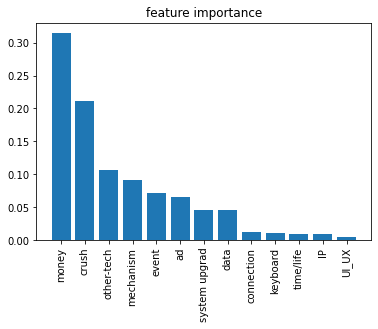

In [15]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X_raw.columns[i] for i in indices]

plt.figure()
plt.title("feature importance")
plt.bar(range(X_raw.shape[1]), importances[indices])
plt.xticks(range(X_raw.shape[1]), names, rotation = 90)
plt.show()

In [30]:
clf = SGDClassifier(random_state = 0)
clf = clf.fit(X,y)
y_pred = clf.predict(X)
f1_score(y_pred,y,average = "weighted")

0.8365347125560053

In [31]:
X.columns

Index(['crush_-1.0', 'crush_0.0', 'data_-1.0', 'data_0.0', 'keyboard_-1.0',
       'keyboard_0.0', 'keyboard_1.0', 'time/life_-1.0', 'time/life_0.0',
       'time/life_1.0', 'IP_-1.0', 'IP_0.0', 'IP_1.0', 'system upgrad_-1',
       'system upgrad_0', 'system upgrad_1', 'connection_-1', 'connection_0',
       'connection_1', 'other-tech_-1', 'other-tech_0', 'other-tech_1',
       'money_-1.0', 'money_0.0', 'money_1.0', 'UI_UX_0.0', 'UI_UX_1.0',
       'event_-1.0', 'event_0.0', 'event_1.0', 'mechanism_-1.0',
       'mechanism_0.0', 'mechanism_1.0', 'ad_-1.0', 'ad_0.0', 'ad_1.0'],
      dtype='object')

In [18]:
clf.classes_

array([1, 2, 3, 4, 5])

In [32]:
clf.coef_

array([[ 0.13538421,  0.0386812 ,  0.15472481,  0.0193406 ,  0.0290109 ,
         0.08703271,  0.0580218 ,  0.        ,  0.12571391,  0.0483515 ,
        -0.0193406 ,  0.14505451,  0.0483515 ,  0.07736241,  0.0290109 ,
         0.06769211,  0.06769211,  0.0386812 ,  0.06769211,  0.08703271,
         0.0580218 ,  0.0290109 ,  0.08703271,  0.0096703 ,  0.07736241,
         0.26109812, -0.08703271,  0.08703271,  0.0193406 ,  0.06769211,
         0.06769211,  0.08703271,  0.0193406 ,  0.0483515 ,  0.0386812 ,
         0.08703271],
       [ 0.26775315,  0.18965848,  0.24544039,  0.21197124,  0.15618934,
         0.15618934,  0.14503296,  0.        ,  0.27890953,  0.1785021 ,
        -0.01115638,  0.27890953,  0.18965848,  0.14503296,  0.13387657,
         0.1785021 ,  0.15618934,  0.22312762,  0.07809467,  0.14503296,
         0.14503296,  0.16734572,  0.18965848,  0.14503296,  0.12272019,
         0.27890953,  0.1785021 ,  0.15618934,  0.13387657,  0.16734572,
         0.1785021 ,  0.15618

# Google

In [20]:
data_goo = data.copy()
data_goo = data_goo[data_goo['if_apple'] == 1]
X_raw = data_goo[name]
y = data_goo['score']
for i in name:
    X_raw[i] = X_raw[i].astype("category")
X = pd.get_dummies(X_raw, columns = name, drop_first = True)
X_raw

<ipython-input-20-73fe2827d55b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_raw[i] = X_raw[i].astype("category")


,crush,data,keyboard,time/life,IP,system upgrad,connection,other-tech,money,UI_UX,event,mechanism,ad
94785,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0
94786,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0
94787,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0
94788,0.0,0.0,0.0,0.0,0.0,0,0,0,-1.0,0.0,0.0,0.0,0.0
94789,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163653,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0
163654,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0
163655,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0
163656,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0


In [21]:
clf = RandomForestClassifier()
clf = clf.fit(X_raw,y)
y_pred = clf.predict(X_raw)
accuracy_score(y_pred,y)

0.7524429021532386

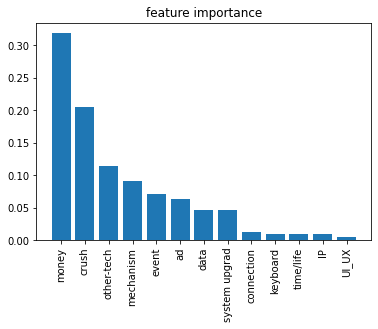

In [22]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X_raw.columns[i] for i in indices]

plt.figure()
plt.title("feature importance")
plt.bar(range(X_raw.shape[1]), importances[indices])
plt.xticks(range(X_raw.shape[1]), names, rotation = 90)
plt.show()

In [23]:
clf = SGDClassifier(random_state = 0)
clf = clf.fit(X,y)
y_pred = clf.predict(X)
f1_score(y_pred,y,average = "weighted")

0.8364698938418058

In [24]:
X.columns

Index(['crush_0.0', 'data_0.0', 'keyboard_0.0', 'keyboard_1.0',
       'time/life_0.0', 'time/life_1.0', 'IP_0.0', 'IP_1.0', 'system upgrad_0',
       'system upgrad_1', 'connection_0', 'connection_1', 'other-tech_0',
       'other-tech_1', 'money_0.0', 'money_1.0', 'UI_UX_1.0', 'event_0.0',
       'event_1.0', 'mechanism_0.0', 'mechanism_1.0', 'ad_0.0', 'ad_1.0'],
      dtype='object')

In [25]:
clf.classes_

array([1, 2, 3, 4, 5])

In [26]:
clf.coef_

array([[-1.13963538e-01, -1.24323860e-01, -5.18016081e-02,
         2.07206433e-02, -4.97295438e-01, -5.49097046e-01,
        -5.18016081e-02, -1.34684181e-01,  1.03603216e-02,
        -3.10809649e-02, -3.10809649e-02, -2.07206433e-02,
        -4.14412865e-02, -6.21619298e-02, -6.21619298e-02,
        -2.07206433e-02, -2.07206433e-01, -6.21619298e-02,
        -4.14412865e-02, -1.03603216e-02, -7.25222514e-02,
        -2.07206433e-02,  2.07206433e-02],
       [-8.45947007e-02, -6.04247862e-02, -1.20849572e-02,
         1.20849572e-02, -1.69189401e-01, -1.93359316e-01,
        -3.62548717e-02, -9.66796580e-02, -6.04247862e-02,
        -2.41699145e-02,  1.20849572e-02, -2.41699145e-02,
        -2.41699145e-02, -1.20849572e-02, -2.41699145e-02,
        -4.83398290e-02, -8.45947007e-02, -4.83398290e-02,
        -1.20849572e-02, -1.20849572e-02, -2.41699145e-02,
         3.62548717e-02,  2.41699145e-02],
       [-3.86812031e-02, -4.83515038e-02, -9.67030077e-03,
         9.67030077e-03, -2.2

In [9]:
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer

In [47]:
def baseline(X_train, y_train, X_test, y_test):
    seq = y_train.unique()
    prob = []
    for i in range(len(seq)):
        curr_value = seq[i]
        prob.append(len([i for i in y_train if i == curr_value]) / len(y_train))
    acc_scores = []
    for i in range(1,10000):
        random_choice = random.choices(seq, weights = prob, k = len(y_test))
        
    return random_choice

In [71]:
data

,userName,date,content,score,if_apple,if_useful,crush,data,keyboard,time/life,IP,system upgrad,connection,other-tech,money,UI_UX,event,mechanism,ad,senti_score
1,crystal may,2022-10-27 12:17:07,aw matter game close progress spent coin gem l...,1,0,1.0,0.0,-1.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.68
3,Jordan Christie,2022-10-26 15:11:40,use love game recent new go sync progress acco...,2,0,1.0,0.0,0.0,0.0,0.0,0.0,0,-1,-1,0.0,0.0,0.0,0.0,0.0,0.72
5,Edward Pridemore,2022-10-25 16:23:41,would give less star could game fun cash grab ...,1,0,1.0,0.0,0.0,0.0,0.0,0.0,-1,0,0,-1.0,0.0,0.0,0.0,0.0,0.81
6,Skylar M,2022-10-25 06:28:03,event biggest problem play certain event certa...,3,0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,-1.0,0.0,0.0,0.66
7,Yeetus Deletus,2022-10-24 18:24:23,bore worst differ shown ad market,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,-1,0.0,0.0,0.0,0.0,0.0,-0.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163542,Alychrda,2020-01-05 22:27:14,love,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.64
163569,02131223,2018-07-30 03:54:37,super fun,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.80
163585,Vhfthf,2022-02-05 11:44:53,good game love,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.80
163590,sssssyeda,2021-04-03 23:15:59,wait much,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.00


In [10]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid_obj = SentimentIntensityAnalyzer()

polarity = [round(sid_obj.polarity_scores(i)['compound'], 2) for i in data['content']]
data['senti_score'] = polarity

In [11]:
label_data = data[['crush', 'data', 'keyboard', 'system upgrad', 'money', 'mechanism',]]
for i in label_data.columns:
    new_name = "label_" + i
    label_data = label_data.rename(columns = {i: new_name})

In [43]:
# X = df_X.join(label_data)
X = df_X

In [45]:
y = data['score']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(data['content'],y,test_size = 0.2,shuffle = True)

tfidf_vectorizer = TfidfVectorizer(use_idf=True, max_features = 100)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_vectors_tfidf = tfidf_vectorizer.transform(X_test)
df_X_train = pd.DataFrame(X_train_vectors_tfidf.toarray(), columns = tfidf_vectorizer.get_feature_names())
df_X_test = pd.DataFrame(X_test_vectors_tfidf.toarray(), columns = tfidf_vectorizer.get_feature_names())

In [48]:
random_choice = baseline(X_train, y_train, X_test, y_test)
print(classification_report(random_choice, y_test))

              precision    recall  f1-score   support

           1       0.07      0.07      0.07      2417
           2       0.04      0.04      0.04      1186
           3       0.07      0.07      0.07      2154
           4       0.14      0.14      0.14      4537
           5       0.69      0.69      0.69     22438

    accuracy                           0.50     32732
   macro avg       0.20      0.20      0.20     32732
weighted avg       0.50      0.50      0.50     32732



In [65]:
import xgboost as xgb
# clf = xgb.XGBRegressor(verbosity=0)
clf = SGDClassifier(random_state = 0)
# rf = RandomForestClassifier(random_state = 0)
clf = clf.fit(df_X_train,y_train)

In [ ]:
clf = svm.SVC()
clf = clf.fit(X_train,y_train)

In [66]:
y_pred = clf.predict(df_X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.41      0.34      0.37      2362
           2       0.16      0.01      0.02      1168
           3       0.25      0.02      0.04      2153
           4       0.33      0.06      0.10      4548
           5       0.74      0.98      0.85     22501

    accuracy                           0.71     32732
   macro avg       0.38      0.28      0.28     32732
weighted avg       0.61      0.71      0.63     32732



In [17]:
Y = data[['score']]
Y = pd.get_dummies(Y, columns = ['score'])
X = pd.get_dummies(X, columns = list(X.columns[-6:]))
Y = np.array(Y)
X = np.array(X)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size = 0.2,shuffle = True)

In [18]:
Xtrain.shape

(22732, 116)

In [20]:
import tensorflow as tf
import keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu',input_shape=(116,)),
    tf.keras.layers.Dense(3,activation='softmax')
])

callbacks = [
    tf.keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_accuracy",
        # "no longer improving" being defined as "for at least 3 epochs"
        patience=3,
        verbose=1,
    )
]

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=["accuracy"])

train_test_history = model.fit(
    Xtrain, Ytrain, 
    batch_size=5, epochs=30,
    callbacks=callbacks,
    validation_data=(Xtest, Ytest))

Epoch 1/30
4547/4547 [==============================] - 5s 1ms/step - loss: 1.0397 - accuracy: 0.4830 - val_loss: 1.0053 - val_accuracy: 0.5322
Epoch 2/30
4547/4547 [==============================] - 5s 1ms/step - loss: 0.9922 - accuracy: 0.5378 - val_loss: 0.9702 - val_accuracy: 0.5595
Epoch 3/30
4547/4547 [==============================] - 5s 1ms/step - loss: 0.9753 - accuracy: 0.5459 - val_loss: 0.9641 - val_accuracy: 0.5612
Epoch 4/30
4547/4547 [==============================] - 5s 1ms/step - loss: 0.9705 - accuracy: 0.5446 - val_loss: 0.9683 - val_accuracy: 0.5561
Epoch 5/30
4547/4547 [==============================] - 5s 1ms/step - loss: 0.9686 - accuracy: 0.5466 - val_loss: 0.9638 - val_accuracy: 0.5600
Epoch 6/30
4547/4547 [==============================] - 5s 1ms/step - loss: 0.9671 - accuracy: 0.5483 - val_loss: 0.9615 - val_accuracy: 0.5621
Epoch 7/30
4547/4547 [==============================] - 5s 1ms/step - loss: 0.9654 - accuracy: 0.5493 - val_loss: 0.9627 - val_accuracy:

In [21]:
Ypred = model.predict(Xtest)

178/178 [==============================] - 0s 755us/step


In [132]:
lst = list(Ypred[1])
lst.index(max(lst)) + 1

4

In [22]:
Y_pred = []
for i in Ypred:
    curr_list = list(i)
    Y_pred.append(curr_list.index(max(curr_list)) + 1)
Y_pred
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           1       0.42      0.60      0.50      2374
           2       0.00      0.00      0.00      1214
           3       0.38      0.42      0.40      2096

    accuracy                           0.40      5684
   macro avg       0.27      0.34      0.30      5684
weighted avg       0.32      0.40      0.35      5684

